In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop and fertilizer dataset.csv')

In [3]:
df.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,0,75,50,100,6.5,1000,20,Sugarcane,Urea
1,0,80,50,100,6.5,1000,20,Sugarcane,Urea
2,0,85,50,100,6.5,1000,20,Sugarcane,Urea
3,0,90,50,100,6.5,1000,20,Sugarcane,Urea
4,0,95,50,100,6.5,1000,20,Sugarcane,Urea


In [4]:
df.tail()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
4508,0,130,80,150,7.0,1400,30,Sugarcane,MOP
4509,0,135,80,150,7.0,1400,30,Sugarcane,MOP
4510,0,140,80,150,7.0,1400,30,Sugarcane,MOP
4511,0,145,80,150,7.0,1400,30,Sugarcane,MOP
4512,0,150,80,150,7.0,1400,30,Sugarcane,MOP


In [5]:
df.size

40617

In [6]:
df.shape

(4513, 9)

In [7]:
df.columns

Index(['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall',
       'Temperature', 'Crop', 'Fertilizer'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

# Label encoding the 'Crop' column
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

# Creating a mapping of crop names to their numerical values
crop_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Saving the mapping to a text file
with open('crop_label_mapping.txt', 'w') as file:
    for crop, label in crop_mapping.items():
        file.write(f"{crop}: {label}\n")

print("Crop label encoding completed and saved to 'crop_label_mapping.txt'.")

Crop label encoding completed and saved to 'crop_label_mapping.txt'.


In [17]:
df.head(10)

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,0,75,50,100,6.5,1000,20,11,Urea
1,0,80,50,100,6.5,1000,20,11,Urea
2,0,85,50,100,6.5,1000,20,11,Urea
3,0,90,50,100,6.5,1000,20,11,Urea
4,0,95,50,100,6.5,1000,20,11,Urea
5,0,100,50,100,6.5,1000,20,11,Urea
6,0,75,55,105,7.0,1100,25,11,Urea
7,0,80,55,105,7.0,1100,25,11,Urea
8,0,85,55,105,7.0,1100,25,11,Urea
9,0,90,55,105,7.0,1100,25,11,Urea


In [18]:
df['Fertilizer'].unique()

array(['Urea', 'DAP', 'MOP', '10:26:26 NPK', 'SSP', 'Magnesium Sulphate',
       '13:32:26 NPK', '12:32:16 NPK', '50:26:26 NPK', '19:19:19 NPK',
       'Chilated Micronutrient', '18:46:00 NPK', 'Sulphur',
       '20:20:20 NPK', 'Ammonium Sulphate', 'Ferrous Sulphate',
       'White Potash', '10:10:10 NPK', 'Hydrated Lime'], dtype=object)

In [19]:
df.dtypes

Soil_color       int64
Nitrogen         int64
Phosphorus       int64
Potassium        int64
pH             float64
Rainfall         int64
Temperature      int64
Crop             int32
Fertilizer      object
dtype: object

In [20]:
df['Fertilizer'].value_counts()

Urea                      1364
DAP                        667
MOP                        571
19:19:19 NPK               480
SSP                        417
Magnesium Sulphate         215
10:26:26 NPK               156
50:26:26 NPK               124
Chilated Micronutrient     108
12:32:16 NPK               106
Ferrous Sulphate            68
13:32:26 NPK                66
Ammonium Sulphate           50
10:10:10 NPK                50
Hydrated Lime               25
White Potash                19
20:20:20 NPK                15
18:46:00 NPK                 6
Sulphur                      6
Name: Fertilizer, dtype: int64

<AxesSubplot:>

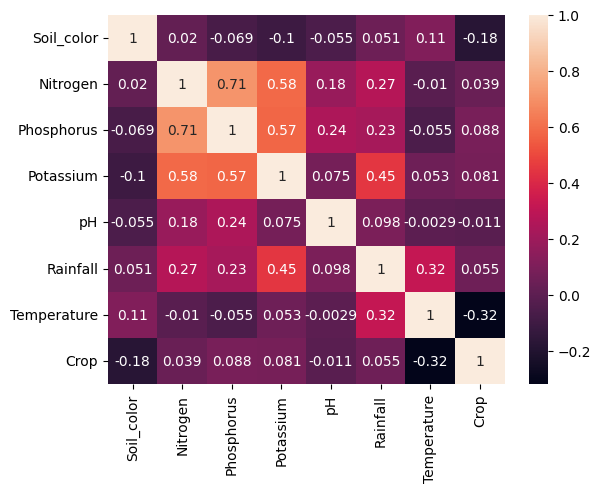

In [21]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [22]:
features = df[['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall',
       'Temperature','Crop']]
target = df['Fertilizer']


In [23]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [24]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  44.518272425249165
                        precision    recall  f1-score   support

          10:10:10 NPK       0.50      0.36      0.42        14
          10:26:26 NPK       0.37      1.00      0.54        33
          12:32:16 NPK       0.50      0.17      0.25        24
          13:32:26 NPK       0.00      0.00      0.00        15
          18:46:00 NPK       0.00      0.00      0.00         0
          19:19:19 NPK       0.61      0.84      0.71        98
          20:20:20 NPK       0.33      1.00      0.50         3
          50:26:26 NPK       0.00      0.00      0.00        26
     Ammonium Sulphate       0.33      0.25      0.29         8
Chilated Micronutrient       0.64      1.00      0.78        21
                   DAP       0.39      0.39      0.39       131
      Ferrous Sulphate       0.44      0.57      0.50        14
         Hydrated Lime       1.00      0.25      0.40         4
                   MOP       0.60      0.16      0.25 

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [28]:
score

array([0.29900332, 0.24473976, 0.22259136, 0.22062084, 0.33924612])

### Saving trained Decision Tree model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models_fer/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.4019933554817276
                        precision    recall  f1-score   support

          10:10:10 NPK       0.43      0.71      0.54        14
          10:26:26 NPK       0.37      1.00      0.54        33
          12:32:16 NPK       0.32      0.50      0.39        24
          13:32:26 NPK       0.16      1.00      0.28        15
          18:46:00 NPK       0.00      0.00      0.00         0
          19:19:19 NPK       0.56      1.00      0.72        98
          20:20:20 NPK       0.33      1.00      0.50         3
          50:26:26 NPK       0.45      1.00      0.62        26
     Ammonium Sulphate       0.38      1.00      0.55         8
Chilated Micronutrient       0.62      0.95      0.75        21
                   DAP       0.29      0.02      0.03       131
      Ferrous Sulphate       0.00      0.00      0.00        14
         Hydrated Lime       0.17      0.25      0.20         4
                   MOP       0.42      0.58      0.49   

In [31]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.3145072 , 0.41085271, 0.36766334, 0.36252772, 0.4368071 ])

### Saving trained Guassian Naive Bayes model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'models_fer/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [33]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.4728682170542636
                        precision    recall  f1-score   support

          10:10:10 NPK       0.50      0.36      0.42        14
          10:26:26 NPK       0.29      0.18      0.22        33
          12:32:16 NPK       0.47      0.29      0.36        24
          13:32:26 NPK       0.43      0.20      0.27        15
          19:19:19 NPK       0.62      0.80      0.70        98
          20:20:20 NPK       0.00      0.00      0.00         3
          50:26:26 NPK       0.83      0.19      0.31        26
     Ammonium Sulphate       0.27      0.50      0.35         8
Chilated Micronutrient       0.57      0.62      0.59        21
                   DAP       0.45      0.40      0.42       131
      Ferrous Sulphate       0.39      0.50      0.44        14
         Hydrated Lime       0.75      0.75      0.75         4
                   MOP       0.55      0.58      0.57       113
    Magnesium Sulphate       0.32      0.22      0.26        45


In [34]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.30232558, 0.30232558, 0.25359911, 0.25498891, 0.29600887])

In [35]:
#Saving trained SVM model

In [36]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'models_fer/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.3289036544850498
                        precision    recall  f1-score   support

          10:10:10 NPK       0.33      0.07      0.12        14
          10:26:26 NPK       0.00      0.00      0.00        33
          12:32:16 NPK       0.00      0.00      0.00        24
          13:32:26 NPK       0.00      0.00      0.00        15
          19:19:19 NPK       0.18      0.02      0.04        98
          20:20:20 NPK       0.00      0.00      0.00         3
          50:26:26 NPK       0.30      0.12      0.17        26
     Ammonium Sulphate       0.00      0.00      0.00         8
Chilated Micronutrient       0.26      0.24      0.25        21
                   DAP       0.34      0.33      0.33       131
      Ferrous Sulphate       0.00      0.00      0.00        14
         Hydrated Lime       0.00      0.00      0.00         4
                   MOP       0.23      0.06      0.10       113
    Magnesium Sulphate       0.12      0.02     

In [38]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.35658915, 0.2923588 , 0.29014396, 0.2405765 , 0.33037694])

### Saving trained Logistic Regression model

In [39]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'models_fer/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9258028792912514
                        precision    recall  f1-score   support

          10:10:10 NPK       0.87      0.93      0.90        14
          10:26:26 NPK       0.77      0.91      0.83        33
          12:32:16 NPK       0.92      0.96      0.94        24
          13:32:26 NPK       1.00      1.00      1.00        15
          19:19:19 NPK       0.91      0.98      0.94        98
          20:20:20 NPK       1.00      1.00      1.00         3
          50:26:26 NPK       0.96      1.00      0.98        26
     Ammonium Sulphate       1.00      1.00      1.00         8
Chilated Micronutrient       0.84      1.00      0.91        21
                   DAP       0.95      0.95      0.95       131
      Ferrous Sulphate       0.92      0.79      0.85        14
         Hydrated Lime       1.00      1.00      1.00         4
                   MOP       0.93      0.98      0.95       113
    Magnesium Sulphate       1.00      0.96      0.98        45
 

In [41]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.28903654, 0.2248062 , 0.23809524, 0.21618625, 0.2827051 ])

### Saving trained Random Forest model

In [42]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'models_fer/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [43]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[15:54:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.973421926910299
                        precision    recall  f1-score   support

          10:10:10 NPK       1.00      1.00      1.00        14
          10:26:26 NPK       1.00      1.00      1.00        33
          12:32:16 NPK       0.96      1.00      0.98        24
          13:32:26 NPK       1.00      1.00      1.00        15
          19:19:19 NPK       0.97      0.99      0.98        98
          20:20:20 NPK       1.00      1.00      1.00         3
          50:26:26 NPK       0.96      1.00      0.98        26
     Ammonium Sulphate       1.00      1.00      1.00         8
Chilated Micronutrient       0.91      0.95      0.93        21
      

In [44]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[15:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.33665559, 0.27906977, 0.21816168, 0.29933481, 0.30266075])

### Saving trained XGBoost model

In [45]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'models_fer/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

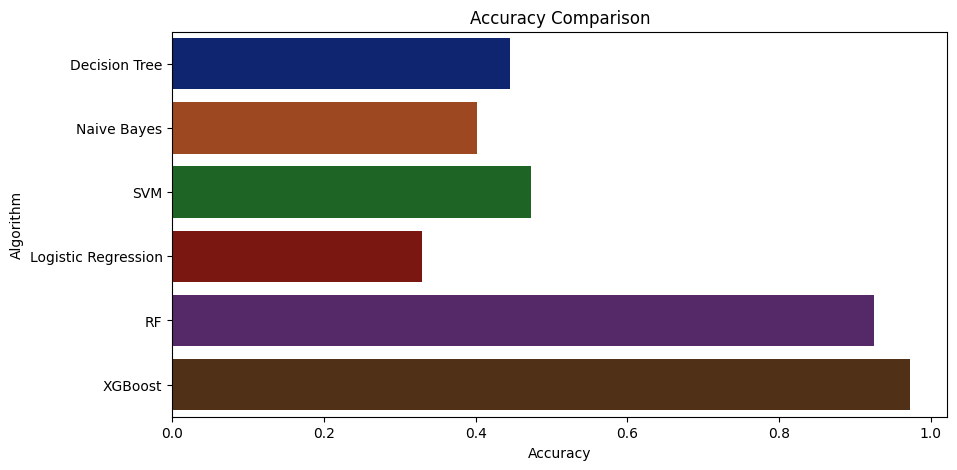

In [46]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [47]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (f"{k} -->  {v*100:.2f}")

Decision Tree -->  44.52
Naive Bayes -->  40.20
SVM -->  47.29
Logistic Regression -->  32.89
RF -->  92.58
XGBoost -->  97.34


## Making a prediction

In [50]:
data = np.array([[4,115,40,50,6,800,25,1]])
prediction = RF.predict(data)[0]
print(prediction)

DAP


In [52]:
data = np.array([[0,50,20,25,7,800,25,1]])
prediction = RF.predict(data)[0]
print(prediction)

18:46:00 NPK
